In [2]:
import argparse
import os
import time
import copy
import six
import sys
import torch
import numpy as np

import torchvision.models as models
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
### tensorboard

from torch.utils.tensorboard import SummaryWriter
from torch.optim import lr_scheduler

writer = SummaryWriter('runs/experiment_prior')
#######
sys.path.append('/home/jbonato/Documents/cvpr_clvision_challenge/')
from core50.dataset import CORE50
from utils.train_test import train_net, test_multitask, preprocess_imgs
from utils.common import create_code_snapshot,check_ext_mem, check_ram_usage

######
import torch.nn as nn
import torch
import numpy

from DIM_model import *
from train import *
from PP_misc.loader import LoadDataset,data_split,data_split_Tr_CV,LoadFeatures
from PP_misc.transf import * 
from model import classifier

from train_prior_disc import save_prior_dist


device = torch.device('cuda:0')
dataset = CORE50(root='/home/jbonato/Documents/cvpr_clvision_challenge/core50/data/', scenario='multi-task-nc',preload=True)


Loading data...
Loading paths...
Loading LUP...
Loading labels...
preparing CL benchmark...


In [3]:
# data0,lab0,t0 = dataset.next()
test =  dataset.get_full_valid_set(reduced=True)
for i in range(len(test)):
    print(test[i][1],np.unique(test[i][0][1]))

0 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
1 [10. 11. 12. 13. 14.]
2 [15. 16. 17. 18. 19.]
3 [20. 21. 22. 23. 24.]
4 [25. 26. 27. 28. 29.]
5 [30. 31. 32. 33. 34.]
6 [35. 36. 37. 38. 39.]
7 [40. 41. 42. 43. 44.]
8 [45. 46. 47. 48. 49.]


In [3]:
testset = dataset.get_full_test_set()


In [12]:
testset[2][1]

2

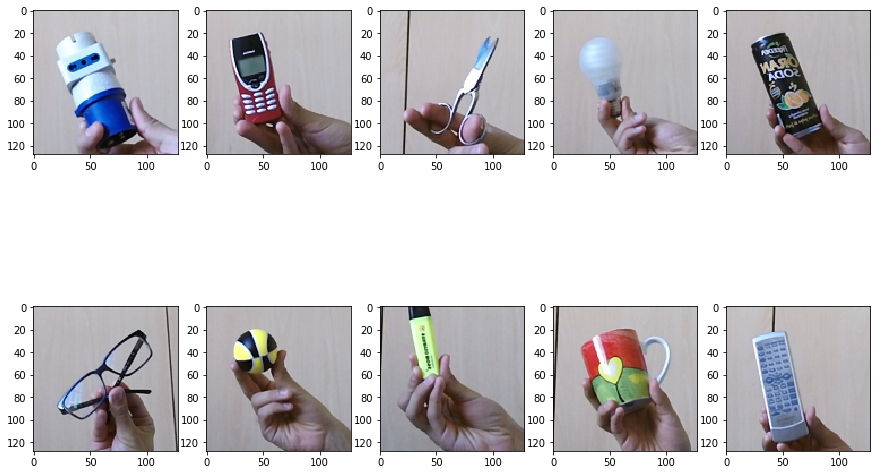

In [5]:
fig,ax = plt.subplots(figsize=(15,10),ncols=5,nrows=2)
for i in range(10):
    qqq =data0[lab0==i,:,:,:]
    ax[i//(5),i%(5)].imshow(qqq[0].astype(np.uint8))

Batch number: 8


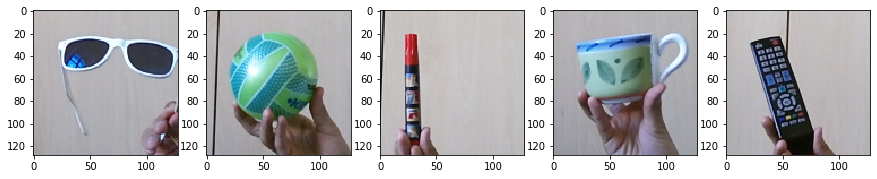

In [13]:
data,lab,t = dataset.next()

fig,ax = plt.subplots(figsize=(15,10),ncols=5,nrows=1)
for i in range((t+1)*5,(t+1)*5+5):
    qqq =data[lab==i,:,:,:]
    ax[i%(5)].imshow(qqq[0].astype(np.uint8))

In [7]:
case = {'0':None,'1':'B','2':'A','3':'B','4':'A','5':'A','6':'A','7':'B','8':'B'}

1

In [14]:
test =  dataset.get_full_valid_set(reduced=True)

In [28]:
test[3][1]

3

Batch number: 4


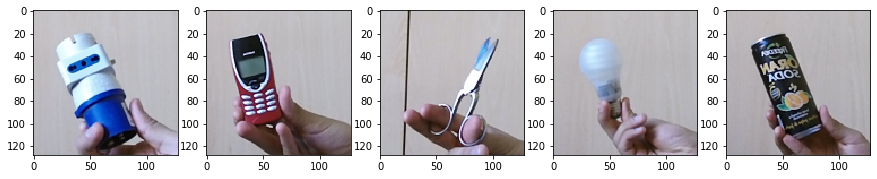

In [17]:
data,lab,t = dataset.next()
fig,ax = plt.subplots(figsize=(15,10),ncols=5,nrows=1)
for i in range(5):
    qqq =data0[lab0==i,:,:,:]
    ax[i%(5)].imshow(qqq[0].astype(np.uint8))

IndexError: index 1 is out of bounds for axis 0 with size 1

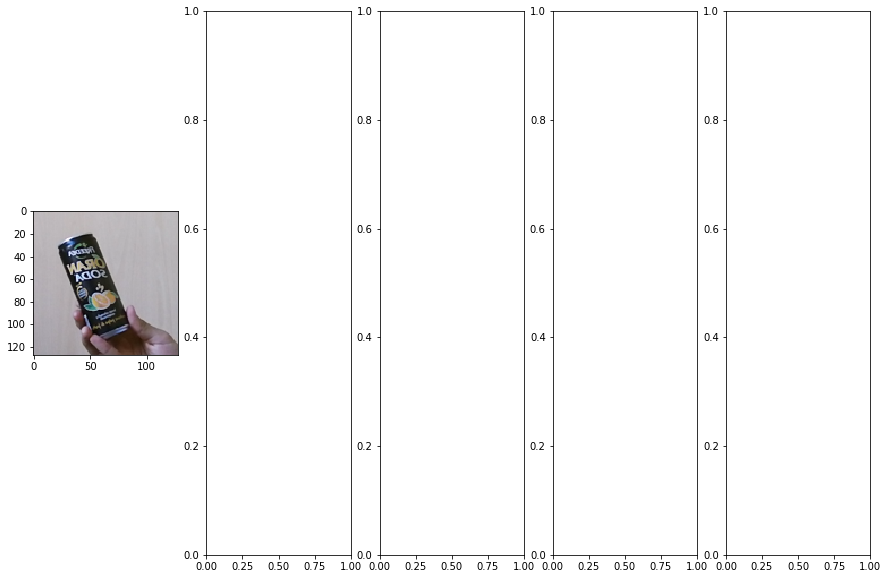